### BAIT 508 HW2: SEC Filings Text Analytics

# DUE DATE: Sunday, Oct 10th, 2021 11:59 p.m.!
# Starter file
This assignment was developed by Xiaoke Zhang, Myunghwan Lee, and Gene Moo Lee.

- <b>Before taking this assignment, please take a look at the instruction carefully.</b>
- In this assignment, you will use your NLP and Python skills (`pandas`, `BeautifulSoup`, `nltk`, `wordcloud`, user-defined functions, ...) to analyze text data of SEC filings and answer the following questions.
- There are short-answer questions and visualization questions. 
- 20 problems, 5 points each, total 100 points
- For visualization questions, save them separately using the specified file name: `hw2_ans{question_number}_{student_id}.png` <br/>
(e.g.) <b>hw2_ans13_37510930.png</b>
- Please <b>don’t</b> submit the `png` file in Canvas. We will run your code to generate this `png` file!
- Submit your Python code in UBC Canvas. DO NOT email your homework to instructors. 
- Again, please submit your code in Canvas. The code file name should be as follows: `hw2_{student_id}.py` <br/>
(e.g.) <b>hw2_37510930.py</b>
- If you do not keep the standard submission format, there will be an <b>extra deduction</b> on your grade. 
- If code is not running, you will get <b>minimum</b> grade (Please run by yourself before submitting the assignment).
- Late submissions will not be accepted!

### Import the appropriate libraries you need to solve the questions.

In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import spacy
import json
from wordcloud import WordCloud
from textblob import TextBlob

### Please assign the variables `first_name`, `last_name`, `student_id`, and `email` with your first name, last name, student ID, and email address.

In [2]:
first_name = str("Carlos Alexandre")
last_name = str("Nako")
student_id = int("45160975")
email = str("cnako@student.ubc.ca")
print('')
print('###############################################################################')
print('')
print("BAIT 508 Assignment 2")
print(first_name+" "+last_name)
print("student id: "+str(student_id))
print(email)
print('')
print('###############################################################################')
print('')

BAIT 508 Assignment 2
Carlos Alexandre Nako
student id: 45160975
cnako@student.ubc.ca


## Download and preprocess the data


### Question 1: Find the shape of `df` and assign it to `ans1` variable.

- Download `corpus_10k_2015-2019.csv` file into the same directory, where `hw2_starter.ipynb` is located. (If not, there will be an extra deduction on your grade)
- First, create user-defined `isYear` function with two parameters (`target_year`, `text`) which check the `year`column value is the same as `target_year` in the `text`.
- Second, open `corpus_10k_2015-2019.csv` file with `open` function and filter the data which the `year` is `2019` using `isYear` function you defined.
- Save the filtered data as a `txt` file called `corpus.subset.txt`.
- Read the txt file you made as a pandas dataframe `df`.
- Drop <b>the columns</b> where <b>all elements are NaN</b> (in other words, this column contains no useful information)
 using `dropna` method from `pandas`.
- Fill <b>the missing values</b> with <b>empty string ("")</b> using `fillna` method from `pandas`.
- If you do not use `isYear` function, then there will be a deduction.
- `ans1` value type should be `tuple`.

[Conditions]
- drop `Nan` value : Yes
- fill missing value with empty string : Yes

[Hint]
- `open` function : https://www.w3schools.com/python/ref_func_open.asp
- `dropna` method : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- `fillna` method : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [3]:
# Defining isYear function, based on code from class 05 'tool1_ch1_user defined functions'
print("Defining isYear function and opening'corpus_10k_2015-2019.csv'")
def isYear(target_year,text):
    """For a string with a header first row, filter the subsequent rows with target year"""
    line = text.split('\n')
    text_subset = str(line[0])+'\n'
    for i in line:
        if str(target_year) in i:
            text_subset = text_subset+str(i)+'\n'
    return text_subset

# opening 'corpus_10k_2015-2019.csv' and running isYear filter
# based on code from class 07 'import1_ch1_import flatfile'
file = open('corpus_10k_2015-2019.csv',mode='r')
corpus_10k = file.read()
file.close()

print("Running isYear filter")

corpus_subset=isYear(2019,corpus_10k)

print("Writing the 'corpus.subset.txt' file")

# Writing the corpus.subset.txt file
# based on code from class 07 'import1_ch1_import flatfile'
outfile = open('corpus.subset.txt','w')
outfile.write(corpus_subset)
outfile.close()

print("Read 'corpus.subset.txt' as a DataFrame and removing empty columns and filling empty cells")

# Read corpus.subset.txt as a DataFrame and removing empty columns and filling empty cells
# based on code from class 07 'import1_ch1_import flatfile', https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html 
# and https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
df = pd.read_csv('corpus.subset.txt')
df = df.dropna(axis='columns',how='all')
df = df.fillna("")
ans1=df.shape

Defining isYear function and opening'corpus_10k_2015-2019.csv'
Running isYear filter
Writing the 'corpus.subset.txt' file
Read 'corpus.subset.txt' as a DataFrame and removing empty columns and filling empty cells


In [4]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 1 answer:')
print(ans1)
print('')
print('###############################################################################')
print('')


Question 1 answer:
(1181, 26)


##  Scrape SIC code and names on the web using BeautifulSoup 

### Question 2: How many `header cell`, `row`, `cell`, and `caption` are in the SIC code table from <b>"List"</b> section of the Wikipedia page ? Please sum up the count of `header cell`, `row`, `cell`, and `caption`, then assign it to `ans2` variable.

- Collect the industry names for sic codes from the <b>"List"</b> section of the Wikipedia page ("https://en.wikipedia.org/wiki/Standard_Industrial_Classification").
- If the above link is not directly linked with the Wikipedia page, please copy and paste the URL on the new tab.
- Create `code_to_industry_name` dictionary where the `key` is the sic code and the `value` is the industry name.
- Then, replace the SIC code "0100 (01111...)" from the table with 0100.


[Hint: HTML Table Tags]
- `<th>`: defines a header cell in a table
- `<tr>`: defines a row in a table
- `<td>`: defines a cell in a table
- `<caption>`: defines a table caption

In [5]:
# scraping wikipedia Standard Industrial Classification for code_to_industry_name dictionary 
# based on code from class 07 'import2_ch1_import flat files from web'
print("scraping wikipedia Standard Industrial Classification for code_to_industry_name dictionary")
url = "https://en.wikipedia.org/wiki/Standard_Industrial_Classification"
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc, "lxml")
tables = soup.find_all('table')
SIC_table = tables[1].find_all('tr')
code_to_industry_name = dict()
for tr in SIC_table:
    try:
        tds=tr.find_all('td')
        k=tds[0].get_text().strip()
        v=tds[1].get_text().strip()
        if k=='0100 (01111...)':
            k='0100'
        code_to_industry_name[int(k)] = v
    except:
        continue


scraping wikipedia Standard Industrial Classification for code_to_industry_name dictionary


In [6]:
# scraping wikipedia Standard Industrial Classification and getting header cell, row, cell, and caption
# based on code from class 07 'import2_ch1_import flat files from web'
print("getting header cell, row, cell, and caption counts")
SICcaption = len(tables[1].find_all('caption'))
SICheader = len(tables[1].find_all('th'))
SICrow = len(tables[1].find_all('tr'))
SICcell = len(tables[1].find_all('td'))

ans2 = SICcaption+SICheader+SICrow+SICcell

getting header cell, row, cell, and caption counts


In [7]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 2 answer:')
print(ans2)
print('')
print('###############################################################################')
print('')


Question 2 answer:
1359


- Add a new column `industry_name` to `df` using `lambda` function.
- Values in `industry_name` must correspond to the `sic` in the `df`.
- For example, if a row has a SIC code of `1000`, then value of its industry name will be `Forestry`.

[Hint]
- `lamda` : https://www.w3schools.com/python/python_lambda.asp

In [8]:
# Adding 'industry_name' column
# based on code from https://www.w3schools.com/python/python_lambda.asp

print("Adding 'industry_name' column")
x = lambda a : code_to_industry_name[a]
a = df['sic'].astype(int)
lst=[]
for i in a:
    lst.append(x(i))
industry_name = pd.DataFrame(lst)
df['industry_name'] = industry_name[0]

Adding 'industry_name' column


## Now, you get the preprocess the dataframe `df` to analyze.

## Industry analysis (Q3-Q5) : use the dataframe `df`

### Question3. What are the 5 most common industries? Get them from `industry_name`, not from `sic` code
- Store a `list` of 5 most common industry names in the `ans3`.
- Sort the `ans3` in the descending order.

In [9]:
# Getting the 5 most common industries
# based on code from class 08 'nlp_part2_keyword analysis wordcloud'
# from Adding 'industry_name' column we have lst as list of industry name which is appended to df

print("Getting the 5 most common industries")
c = Counter(lst)
lst2 = c.most_common(5)
ans3 = [lst2[0][0],lst2[1][0],lst2[2][0],lst2[3][0],lst2[4][0]]

Getting the 5 most common industries


In [10]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 3 answer:')
print(ans3)
print('')
print('###############################################################################')
print('')


Question 3 answer:
['Pharmaceutical Preparations', 'Blank Checks', 'Services-Prepackaged Software', 'Biological Products, (No Diagnostic Substances)', 'Surgical & Medical Instruments & Apparatus']


### Question4. Count the number of rows, which `industry_name` value starts with `Wholesale` and ends with `Supplies` . Please assign the number to the `ans4` variable. 

- Here, first character (`W` and `S`) is uppercase.
- `ans4` data type is `int`.

Hint:
- string.startswith: https://www.w3schools.com/python/ref_string_startswith.asp
- string.endswith: https://www.w3schools.com/python/ref_string_endswith.asp

In [11]:
# Getting the count of industry_name value that starts with Wholesale and ends with Supplies
# based on code from class 06 'pandas part1 exploratory data analysis',
# https://www.w3schools.com/python/ref_string_startswith.asp and https://www.w3schools.com/python/ref_string_startswith.asp
# from Adding 'industry_name' column we have lst as list of industry name which is appended to df

print("Getting the count of industry_name value that starts with Wholesale")
lst3 = []
for i in lst:
    if i.startswith("Wholesale"):
        lst3.append(i)

print("Getting the count of industry_name value that starts with Wholesale and ends with Supplies")        
lst4=[]        
for i in lst3:
    if i.endswith("Supplies"):
        lst4.append(i)
ans4 = len(lst4)

Getting the count of industry_name value that starts with Wholesale
Getting the count of industry_name value that starts with Wholesale and ends with Supplies


In [12]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 4 answer:')
print(ans4)
print('')
print('###############################################################################')
print('')


Question 4 answer:
5


### Question5. What is the `name` of the company `id` with `1353611-2019`?
- Store the company name as a `string` in the `ans5`.

In [13]:
# Filtering DataFrame for id 1353611-2019 and storing name into ans5

print("Filtering DataFrame for id 1353611-2019 and storing name into ans5")
be = df[df['id']=='1353611-2019']['name'].index.tolist()
ans5 = df[df['id']=='1353611-2019']['name'][be[0]]

Filtering DataFrame for id 1353611-2019 and storing name into ans5


In [14]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 5 answer:')
print(ans5)
print('')
print('###############################################################################')
print('')


Question 5 answer:
Invesco CurrencyShares British Pound Sterling Trust


## Keyword analysis (Q6 and Q7)

## (Q6-Q7) : use the dataframe `df`
### For Q6 and Q7 you will filter out stopwords and non-alphanumeric English characters. 
- You can use `nltk.corpus.stopwords` for our definition of stopwords. 
- Alphanumeric English characters are letters in the alphabet (a-z, A-Z) and numbers (0-9).
- For example, <b>"Python is awesome👍 great7777 !!! "</b> would be filtered to <b>"Python awesome great"</b> after removing stopwords (in this case "is"), exclamation mark, numbers, and the emoji (non-alphanumeric).
- Please use `nltk.tokenize` package to solve Q6 and Q7. 


[Hint]
- `nltk.corpus` for stopwords : https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- `nltk.tokenize` package : https://www.nltk.org/api/nltk.tokenize.html

In [15]:
# getting stopwords
# based on code from class 08 'nlp_part2_keyword analysis wordcloud', https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# and https://www.nltk.org/api/nltk.tokenize.html

stop_words = set(stopwords.words('english'))

### Question6. What are the 5 most common words from the `Item_5` column?
- Store a `list` of the 5 most common words in `ans6`.
- Sort the `ans6` in the ascending order.

[Conditions]
- Need lowercase : `Yes`
- Filter stopwords : `No`
- Filter non-Alphanumeric English character : `Yes`
- Filter single length character : `No`

In [16]:
columns = [col for col in df.columns if 'item' in col]

In [17]:
# filtering the column, spliting the words and removing non-characters
# based on code from https://www.kite.com/python/answers/how-to-make-a-pandas-dataframe-string-column-lowercase-in-python, 
# class 05 'inter_ch4_loop group exercises' and https://newbedev.com/replace-all-non-alphanumeric-characters-in-a-string

print("Filtering the column, spliting the words and removing non-characters from item_5")
df['item_5_lower'] = df['item_5'].str.lower()
lst5 = []
for i in df['item_5_lower']:
    ite = word_tokenize(i)
    for n in ite:
        wor = re.sub('[^0-9a-zA-Z]+','',n)
        if len(wor)>0:
            lst5.append(wor)

# based on code from class 08 'nlp_part2_keyword analysis wordcloud'
print("Getting the 5 most common words")
ctr = Counter(lst5)
lst6 = ctr.most_common(5)
ans6 = [lst6[0][0],lst6[1][0],lst6[2][0],lst6[3][0],lst6[4][0]]         

Filtering the column, spliting the words and removing non-characters from item_5
Getting the 5 most common words


In [18]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 6 answer:')
print(ans6)
print('')
print('###############################################################################')
print('')


Question 6 answer:
['the', 'of', 'and', 'to', 'our']


### Question7. What are the 5 most common words from the `Item_5` column without stopwords?
- Store a `list` of the 5 most common words in `ans7`.
- Sort the `ans7` in the descending order.

[Conditions]
- Need lowercase : `Yes`
- Filter stopwords : `Yes`
- Filter non-Alphanumeric English character : `Yes`
- Filter single length character : `No`

In [19]:
# filtering the column, spliting the words, removing non-characters and removing stopwords
# based on code from https://www.kite.com/python/answers/how-to-make-a-pandas-dataframe-string-column-lowercase-in-python, 
# class 05 'inter_ch4_loop group exercises' and https://newbedev.com/replace-all-non-alphanumeric-characters-in-a-string

print("Filtering the column, spliting the words, removing non-characters and removing stopwords")
lst7 = []
for i in df['item_5_lower']:
    ite = word_tokenize(i)
    for n in ite:
        wor = re.sub('[^0-9a-zA-Z]+','',n)
        if wor in stop_words:
            wor = ''
        if len(wor)>0:
            lst7.append(wor)

# based on code from class 08 'nlp_part2_keyword analysis wordcloud'
print("Getting the 5 most common words")
ctr = Counter(lst7)
lst8 = ctr.most_common(5)
ans7 = [lst8[0][0],lst8[1][0],lst8[2][0],lst8[3][0],lst8[4][0]]

Filtering the column, spliting the words, removing non-characters and removing stopwords
Getting the 5 most common words


In [20]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 7 answer:')
print(ans7)
print('')
print('###############################################################################')
print('')


Question 7 answer:
['stock', 'common', 'shares', 'securities', 'equity']


## Named Entity Recognition (Q8-Q11)
## (Q8-Q11) : use the dataframe `df_50`

- To reduce the processing time, please select first 50 rows from the dataframe `df` using `head(50)` option and save the dataframe as `df_50`. 
- `df_50` dataframe will be used for Q8-Q11.
- If any of the entities are spaces, exclude them when considering the most common.
    - `(" ")` is not a valid entity. To remove the entities that are spaces, please use `split`, `strip` and `join` method.
- Suppose that you have the following sentence, which is <b>'&nbsp;&nbsp;I&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;love&nbsp;&nbsp;&nbsp;&nbsp;python&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'</b>.
- In this case, you need to make it as <b>'I love python'</b>.

In [21]:
# Creating df_50

df_50 = df.head(50)


### Question8. What are the 5 most common `PERSON` named entities overall from the `item_1` column?
- Store a `list` of the 5 most common `PERSON` named entities in `ans8`.
- Sort the `ans8` in the descending order.


[Conditions]
- Need lowercase : `No`
- Filter stopwords : `No`
- Filter non-Alphanumeric English character : `No`
- Filter single length character : `No`

In [22]:
# Finding common PERSON named entities
# based on code from class 08 'nlp_part4_named entity recognition', https://spacy.io/ and https://explosion.ai/demos/displacy-ent

print("Getting the name entities from item_1")
lst9=[]
nlp = spacy.load('en_core_web_sm')
for i in df_50['item_1']:
    if len(i)>0:
        k=i
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        doc=nlp(k)
        for ent in doc.ents:
            if ent.label_=='PERSON':
                lst9.append(ent.text)

print("Getting 5 most common PERSON named entities")
ctr3 = Counter(lst9)
lst10 = ctr3.most_common(5)
ans8 = [lst10[0][0],lst10[1][0],lst10[2][0],lst10[3][0],lst10[4][0]]

Getting the name entities from item_1
Getting 5 most common PERSON named entities


In [23]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 8 answer:')
print(ans8)
print('')
print('###############################################################################')
print('')


Question 8 answer:
['Quell', 'Benny Lee', 'Levi', 'Penn', 'Joo Chai']


### Question9. How many `ORG` named entities only have 1 occurrence case in `item_8` column?
- Store the number of cases as a `integer` in `ans9`.
- `ORG` includes companies, agencies, and institutions.

[Conditions]
- Need lowercase : `No`
- Filter stopwords : `No`
- Filter non-Alphanumeric English character : `No`
- Filter single length character : `No`

In [24]:
# Finding ORG named entities with 1 occurence in item_8
# based on code from class 08 'nlp_part4_named entity recognition', https://spacy.io/ and https://explosion.ai/demos/displacy-ent

print("Getting the name entities from item_8")
lst11=[]
for i in df_50['item_8']:
    if len(i)>0:
        k=i
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        doc=nlp(k)
        for ent in doc.ents:
            if ent.label_=='ORG':
                lst11.append(ent.text)

print("Getting the count of ORG named entities with only 1 occurence")
ctr4 = Counter(lst11)
lst12 = ctr4.most_common()
lst13 = []
for i in lst12:
    if i[1]==1:
        lst13.append(i[0])
ans9 = len(lst13)

Getting the name entities from item_8
Getting the count of ORG named entities with only 1 occurence


In [25]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 9 answer:')
print(ans9)
print('')
print('###############################################################################')
print('')


Question 9 answer:
1585


### Question10. What are the 4 most common named entities overall from the `item_9` column?
- Store a `list` of the 4 most common named entities in `ans10`.
- Sort the `ans10` in the descending order.

[Conditions]
- Need lowercase : `No`
- Filter stopwords : `No`
- Filter non-Alphanumeric English character : `No`
- Filter single length character : `No`

In [26]:
# Finding 4 most common named entities in item_9
# based on code from class 08 'nlp_part4_named entity recognition', https://spacy.io/ and https://explosion.ai/demos/displacy-ent

print("Getting the name entities from item_9")
lst14=[]
for i in df_50['item_9']:
    if len(i)>0:
        k=i
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        doc=nlp(k)
        for ent in doc.ents:
            lst14.append(ent.label_)

print("Getting the 4 most common named entities with only 1 occurence")       
ctr3 = Counter(lst14)
lst15 = ctr3.most_common()
ans10 = [lst15[0][0],lst15[1][0],lst15[2][0],lst15[3][0]]

Getting the name entities from item_9
Getting the 4 most common named entities with only 1 occurence


In [27]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 10 answer:')
print(ans10)
print('')
print('###############################################################################')
print('')


Question 10 answer:
['ORG', 'DATE', 'PERSON', 'LOC']


### Question11. Count the number of companies whose `item_1` contains the most common named entity in all rows of `item_1`.
- Filter out companies whose `item_1` contain the result you get above.
- Count the numbers of distinct companies and store your answer in `ans11`.
- You will use `df_50` for all evaluation

[Conditions]
- Need lowercase : `No`
- Filter stopwords : `No`
- Filter non-Alphanumeric English character : `No`
- Filter single length character : `No`

In [28]:
# Finding common named entities in item_1
# based on code from class 08 'nlp_part4_named entity recognition', https://spacy.io/ and https://explosion.ai/demos/displacy-ent

print("Getting the name entities from item_1")
lst16=[]
for i in df_50['item_1']:
    if len(i)>0:
        k=i
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        doc=nlp(k)
        for ent in doc.ents:
            lst16.append(ent.label_)

print("Getting the most common named entities")  
ctr5 = Counter(lst16)
lst17 = ctr5.most_common()

Getting the name entities from item_1
Getting the most common named entities


In [29]:
# Finding the number of companies whose item_1 contains the most common named entity in all rows of item_1
# based on code from class 08 'nlp_part4_named entity recognition', https://spacy.io/ and https://explosion.ai/demos/displacy-ent

print("Getting the number of companies whose item_1 contains the most common named entity in all rows of item_1")
lst18=[]
j=0
l=0
for i in df_50['item_1']:
    if len(i)>0:
        k=i
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        doc=nlp(k)
        m=0
        for ent in doc.ents:
            if lst17[0][0]==ent.label_:
                m=m+1
                l=l+1
                lst18.append(ent.text)
        if m>0:
            j=j+1

ans11 = j


Getting the number of companies whose item_1 contains the most common named entity in all rows of item_1


In [30]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 11 answer:')
print(ans11)
print('')
print('###############################################################################')
print('')


Question 11 answer:
41


## NER for specific firm (Q12-Q13)
## (Q12-Q13) : use the dataframe `df`
- You want to find the information on the company with id `1653710-2019`.
- Given list comprehension, you want to find out common entities in the dataframe `df`.
- If any of the entities are spaces, exclude them when considering the most common.
- `(" ")` is not a valid entity. To remove the entities that are spaces, please use `split` and `join` method.
- Suppose that you have the following sentence, which is <b>'&nbsp;&nbsp;I&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;love&nbsp;&nbsp;&nbsp;&nbsp;python&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'</b>.
- In this case, you need to make it as <b>'I love python'</b>.

### Question12. what are the 4 most common `PERSON` named entities mentioned by the company with id `1653710-2019` across all rows with fixed prefix `item_`?
- Store a `list` of the 4 most common `PERSON` named entities in `ans12`.
- Sort the `ans12` in the descending order.

[Conditions]
- Need lowercase : `No`
- Filter stopwords : `No`
- Filter non-Alphanumeric English character : `No`
- Filter single length character : `No`

In [31]:
# Finding the 4 most common PERSON named entities mentioned by the company with id 1653710-2019 across all rows with fixed prefix item_
# based on code from class 08 'nlp_part4_named entity recognition', https://spacy.io/ and https://explosion.ai/demos/displacy-ent

print("Getting the PERSON name entities from all item_ accross id=1653710-2019")
lst19=[]
for n in columns:
    for i in df_50[df_50['id']=='1653710-2019'][n]:
        if len(i)>0:
            k=i
            while k.count('  ')>0:
                t=k.split('  ')
                k=' '.join(t)
            doc=nlp(k)
            for ent in doc.ents:
                if ent.label_=='PERSON':
                    lst19.append(ent.text)
                
print("Getting the 4 most common PERSON named entities")  
ctr6 = Counter(lst19)
lst20 = ctr6.most_common()
ans12 = [lst20[0][0],lst20[1][0],lst20[2][0],lst20[3][0]]

Getting the PERSON name entities from all item_ accross id=1653710-2019
Getting the 4 most common PERSON named entities


In [32]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 12 answer:')
print(ans12)
print('')
print('###############################################################################')
print('')


Question 12 answer:
['Qian', 'Jeff Bodnar', 'Dabasinkas', 'Bo Qian']


### Question13. What are the 2 most common `GPE` named entities mentioned by the company with id `1653710-2019` across all with fixed prefix `item_`?
- Store a `list` of the 2 most common `GPE` named entities in `ans13`.
- `GPE` includes geopolitical entities such as countries, cities, and states.!
- Sort the `ans13` in the ascending order.

[Conditions]
- Need lowercase : `No`
- Filter stopwords : `No`
- Filter non-Alphanumeric English character : `No`
- Filter single length character : `No`

In [33]:
# Finding the 2 most common GPE named entities mentioned by the company with id 1653710-2019 across all with fixed prefix item_
# based on code from class 08 'nlp_part4_named entity recognition', https://spacy.io/ and https://explosion.ai/demos/displacy-ent

print("Getting the GPE name entities from all item_ accross id=1653710-2019")
lst21=[]
for n in columns:
    for i in df_50[df_50['id']=='1653710-2019'][n]:
        if len(i)>0:
            k=i
            while k.count('  ')>0:
                t=k.split('  ')
                k=' '.join(t)
            doc=nlp(k)
            for ent in doc.ents:
                if ent.label_=='GPE':
                    lst21.append(ent.text)
                
print("Getting the 2 most common GPE named entities")  
ctr7 = Counter(lst21)
lst22 = ctr7.most_common()
ans13 = [lst22[0][0],lst22[1][0]]

Getting the GPE name entities from all item_ accross id=1653710-2019
Getting the 2 most common GPE named entities


In [34]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 13 answer:')
print(ans13)
print('')
print('###############################################################################')
print('')


Question 13 answer:
['China', 'Companys']


## Twitter analysis (Q14-Q15)
### `tweets.json` collected  50,000 tweets containing below keywords: 
- Keyword : `analytics`, `technology`, `big data`, `machine learning`, `artificial intelligence`
- The way used to collect the Twitter streaming data is using `tweepy` and `twython` module.
- `tweepy` for Twitter streaming : http://docs.tweepy.org/en/latest/streaming_how_to.html

### Save and read the `tweets.json` file as `tweets` 
- Download `tweets.json` file into the same directory, where `hw2_starter.ipynb` is located. (If not, there will be an extra deduction on your grade)
- Open `tweets.json` file as `tweets` with `open` function.
- please select first `10,000` tweets from `tweets`.

[Hint]
- `open` function : https://www.w3schools.com/python/ref_func_open.asp

In [35]:
# Open tweets.json
# based on code from class 07 'import2_ch2_api_json'

print('Open tweets.json')
with open("tweets.json") as json_file:
    tweets = json.load(json_file)
    
tweets = tweets[:10000]

Open tweets.json


### Question14. Find the firm that has the most common words between `item_1` and the 10,000 tweets. 
### Q14 : use the dataframe `df_50`

- First, find the 100 most common words of each firm's `item_1` column in `df_50` by using `nltk.tokenize` package.
- Then, use the top the top 100 most common words of the 10,000 tweets after removing stop words by using `nltk.tokenize` package.
- Next find the most common words between `item_1` and the 10,000 tweets. 
- Disregard the word count, we are only interested in the number of unqiue words that appear in intersection of both common words.
- Store the answer as a string in `ans14`.
- Don't need to filter the words with length 1.
- Need to filter stopwords and non-alphanumeric english character in each firm's `item_1` column.
- When you filter the stopwords, you need to make words lowercase.
- Store the firm name as a `string` in `ans14`.

[Conditions]
- Need lowercase : `Yes`
- Filter stopwords : `Yes`
- Filter non-Alphanumeric English character : `Yes`
- Filter single length character : `No`

[Hint]
- `nltk.corpus` for stopwords : https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- `isalnum()`: https://www.w3schools.com/python/ref_string_isalnum.asp

In [36]:
# filtering df_50 column 'item_1' top 100 most common words for each firm
# based on code from https://www.kite.com/python/answers/how-to-make-a-pandas-dataframe-string-column-lowercase-in-python, 
# class 05 'inter_ch4_loop group exercises' and https://newbedev.com/replace-all-non-alphanumeric-characters-in-a-string

print("Filtering df_50 column 'item_1' top 100 most common words for each firm")
df_50['item_1_lower'] = df_50['item_1'].str.lower()
lst23 = []
lst24 = []
for lab,row in df_50.iterrows():
    ite = word_tokenize(row['item_1_lower'])
    lst25=[]
    for n in ite:
        wor = re.sub('[^0-9a-zA-Z]+',"",n)
        if wor in stop_words:
            wor = ''
        if len(wor)>0:
            lst25.append(wor)
    ctr8 = Counter(lst25)
    lst23.append(ctr8.most_common(100))
    lst24.append(row['name'])


Filtering df_50 column 'item_1' top 100 most common words for each firm


<ipython-input-36-a9a8fd315c48>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_50['item_1_lower'] = df_50['item_1'].str.lower()


In [60]:
# filtering top the top 100 most common words of the 10,000 tweets
# based on code from https://www.kite.com/python/answers/how-to-make-a-pandas-dataframe-string-column-lowercase-in-python, 
# class 05 'inter_ch4_loop group exercises' and https://newbedev.com/replace-all-non-alphanumeric-characters-in-a-string
print("Filtering tweet top 100 most common words")
lst26=[]
for i in range(0,len(tweets)):
    j = tweets[i]['text'].lower()
    ite = word_tokenize(j)
    for n in ite:
        wor = re.sub('[^0-9a-zA-Z]+',"",n)
        if wor in stop_words:
            wor = ''
        if len(wor)>0:
            lst26.append(wor)
        
ctr9 = Counter(lst26)
lst27 = ctr9.most_common(100)

lst28=[]
for i,row in enumerate(lst27):
    lst28.append(row[0])

In [69]:
# finding the most common words between item_1 and the 10,000 tweets. 
# based on code from https://www.journaldev.com/37089/how-to-compare-two-lists-in-python

print("Finding the firm that has the most common words between item_1 and the 10,000 tweets")
company=0
most_common=0
for i,row in enumerate(lst23):
    if len(row)>0:
        lst29=[]
        for l,rw in enumerate(row):
            lst29.append(rw[0])
            common = [x for x in lst29 if x in lst28]
            if len(common)>most_common:
                most_common = len(common)
                company = i

                
ans14 = lst24[company]

In [70]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 14 answer:')
print(ans14)
print('')
print('###############################################################################')
print('')


Question 14 answer:
Snap Inc


### Question15. In the selected 10,000 tweets, what are the 5 most common named entities mentioned?
- You need to use the NER for this question.
- If any of the entities are spaces, exclude them when considering the most common.
    - `(" ")` is not a valid entity. To remove the entities that are spaces, please use `split`, `strip` and `join` method.
- Suppose that you have the following sentence, which is <b>'&nbsp;&nbsp;I&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;love&nbsp;&nbsp;&nbsp;&nbsp;python&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'</b>.
- In this case, you need to make it as <b>'I love python'</b>.
- Store a list of the 5 most common named entities in `ans15`.
- Sort the `ans15` in the ascending order.

[Conditions]
- Need lowercase : `No`
- Filter stopwords : `No`
- Filter non-Alphanumeric English character : `No`
- Filter single length character : `No`

In [71]:
# Finding 5 most common named entities in the selected 10,000 tweets
# based on code from class 08 'nlp_part4_named entity recognition', https://spacy.io/ and https://explosion.ai/demos/displacy-ent

print("Getting 5 most common named entities in the selected 10,000 tweets")
lst30=[]
for i in range(0,len(tweets)):
    j = tweets[i]['text']
    if len(j)>0:
        k=j
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        doc=nlp(k)
        for ent in doc.ents:
            lst30.append(ent.label_)

ctr10 = Counter(lst30)
lst31 = ctr10.most_common()
ans15 = [lst31[0][0],lst31[1][0],lst31[2][0],lst31[3][0],lst31[4][0]]

Getting 5 most common named entities in the selected 10,000 tweets
Getting the 4 most common named entities with only 1 occurence


In [72]:
# printing answer
print('')
print('###############################################################################')
print('')
print('Question 15 answer:')
print(ans15)
print('')
print('###############################################################################')
print('')


Question 15 answer:
['ORG', 'PERSON', 'CARDINAL', 'MONEY', 'DATE']


## Word cloud and sentiment analysis (Q16-Q19)

## (Q16-Q19) : use the dataframe `df`

- Use `wordcloud` library and `WordCloud` function in it.
- Define user-defined `generate_wordcloud` function with one parameter `values` to generate word cloud for one input value.
- You don't need `axis` in the wordcloud and use `bilinear` interpolation. 

[Hint]
- `bilinear` for `imshow()` : https://matplotlib.org/3.3.1/gallery/images_contours_and_fields/interpolation_methods.html

In [96]:
# defining generate_wordcloud:
# based on code from class 08 'nlp_part2_keyword analysis wordcloud' and https://matplotlib.org/3.3.1/gallery/images_contours_and_fields/interpolation_methods.html

def generate_wordcloud(values):
    """Input the text string to compute wordcloud and set wordcloud plot.
    'show()' command is not in the function so title and file name can be generated in separate prior to show."""
    wordcloud = WordCloud(width=800, height=400).generate(values) # note that text is a string, not a list
    plt.figure(figsize=(20,10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    
    

## For the following analyses, find the top two most common industries names
- Assign the most common industry name as `top_1` and the second most common industry name as `top_2`.

In [77]:
# Finding the most common industry name
# based on code from class 08 'nlp_part2_keyword analysis wordcloud'
print("Getting the 2 most common industry name")
ctr11 = Counter(df['industry_name'])
lst32 = ctr11.most_common(5)
top_1 = lst32[0][0]
top_2 = lst32[1][0]
print(top_1)
print(top_2)

Getting the 5 most common words
Pharmaceutical Preparations
Blank Checks


### Question16. Make two separate wordclouds for `item_1` column.

- One for the most common industry and another one for the second most common industry.
- Save the graph named "`hw2_ans16a_{student_id}.png`" and "`hw2_ans16b_{student_id}.png`".<br/>
  (e.g.) <b>hw2_ans16a_37510930.png</b>, <b>hw2_ans16b_37510930.png</b>, respectively.

In [110]:
# Getting the wordclouds input
# based on code from class 05 'inter_ch4_loops'

print("Getting the wordclouds input for 'item_1' and 2 most common industry")
top_1_string_16 = ''
top_2_string_16 = ''
for i,row in df.iterrows():
    if row['industry_name']==top_1:
        k=row['item_1']
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        top_1_string_16 = top_1_string_16 + ' ' + k
    if row['industry_name']==top_2:
        k=row['item_1']
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        top_2_string_16 = top_2_string_16 + ' ' + k

Getting the wordclouds input for 'item_1' and 2 most common industry


Generate wordcloud using user defined function for 'item_1' and 2 most common industry


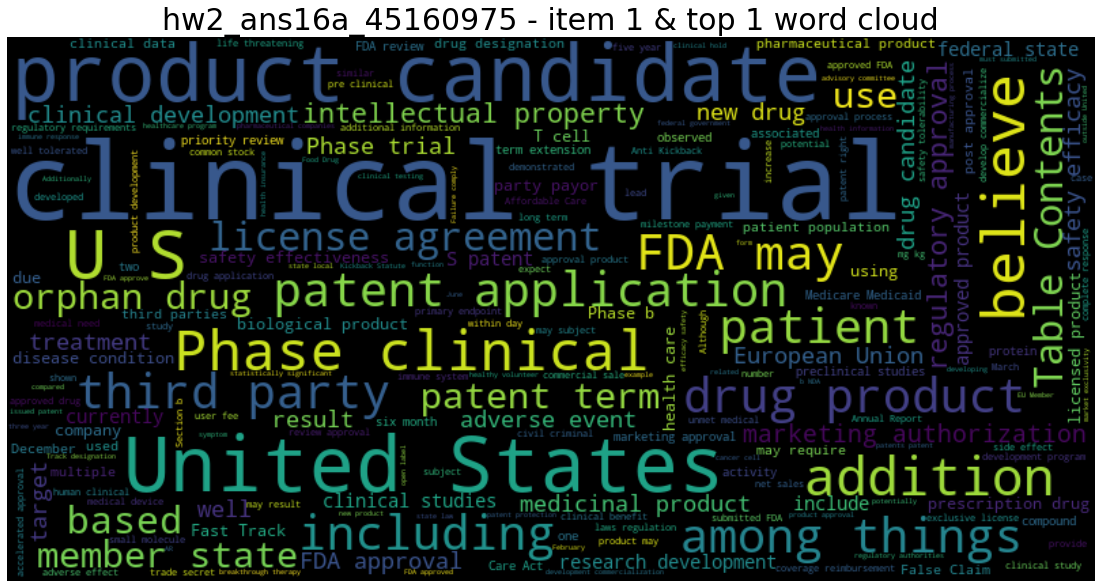

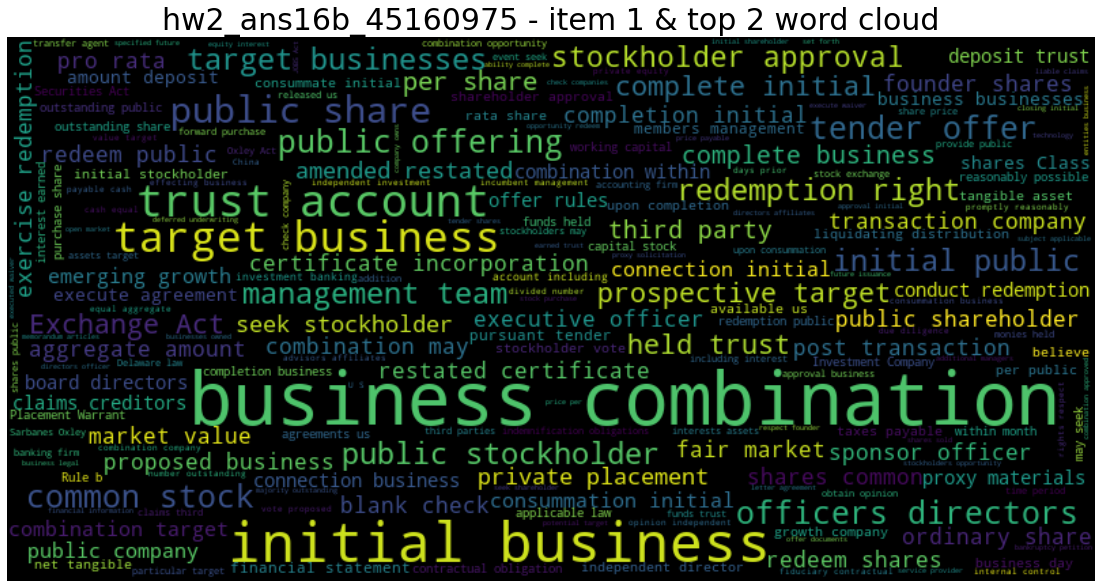

In [111]:
# Generate wordcloud using user defined function
# based on code from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title

print("Generating wordcloud using user defined function for 'item_1' and 2 most common industry")
generate_wordcloud(top_1_string_16)
plt.title('hw2_ans16a_45160975 - item 1 & top 1 word cloud', fontdict={'fontsize':30})
plt.savefig('hw2_ans16a_45160975.png')
plt.show()

generate_wordcloud(top_2_string_16)
plt.title('hw2_ans16b_45160975 - item 1 & top 2 word cloud', fontdict={'fontsize':30})
plt.savefig('hw2_ans16b_45160975.png')
plt.show()

### Question17. Make two separate wordclouds for `item_1a`column.
- One for the most common industry and another one for the second most common industry.
- Save the graph named "`hw2_ans17a_{student_id}.png`" and "`hw2_ans17b_{student_id}.png`".<br/>
  (e.g.) <b>hw2_ans17a_37510930.png</b>, <b>hw2_ans17b_37510930.png</b>, respectively.

In [81]:
# Getting the wordclouds input
# based on code from class 05 'inter_ch4_loops'

print("Getting the wordclouds input for 'item_1a' and 2 most common industry")
top_1_string_17 = ''
top_2_string_17 = ''
for i,row in df.iterrows():
    if row['industry_name']==top_1:
        k=row['item_1a']
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        top_1_string_17 = top_1_string_17 + ' ' + k
    if row['industry_name']==top_2:
        k=row['item_1a']
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        top_2_string_17 = top_2_string_17+ ' ' + k

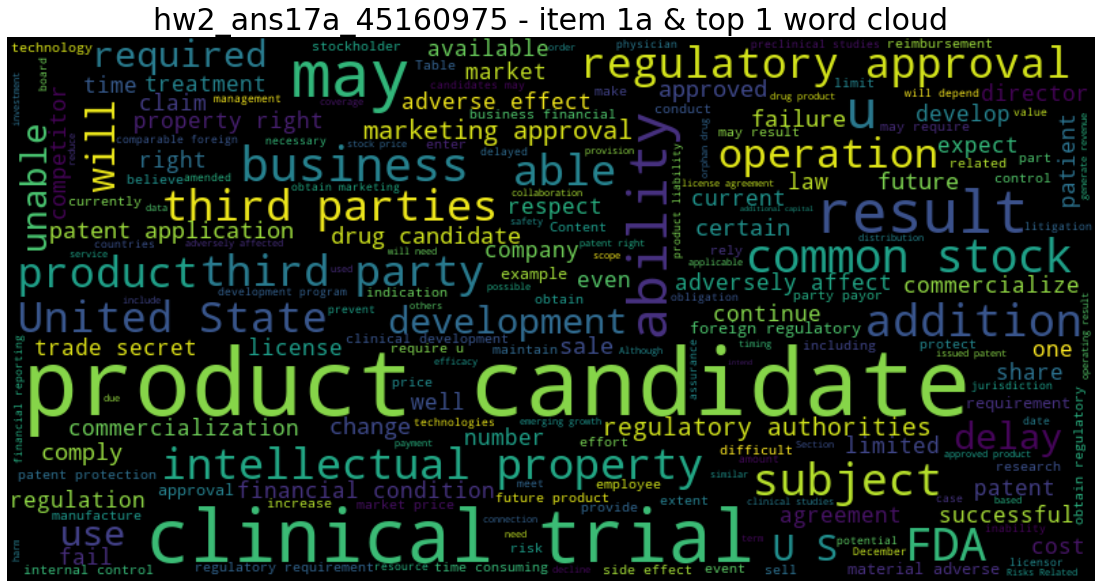

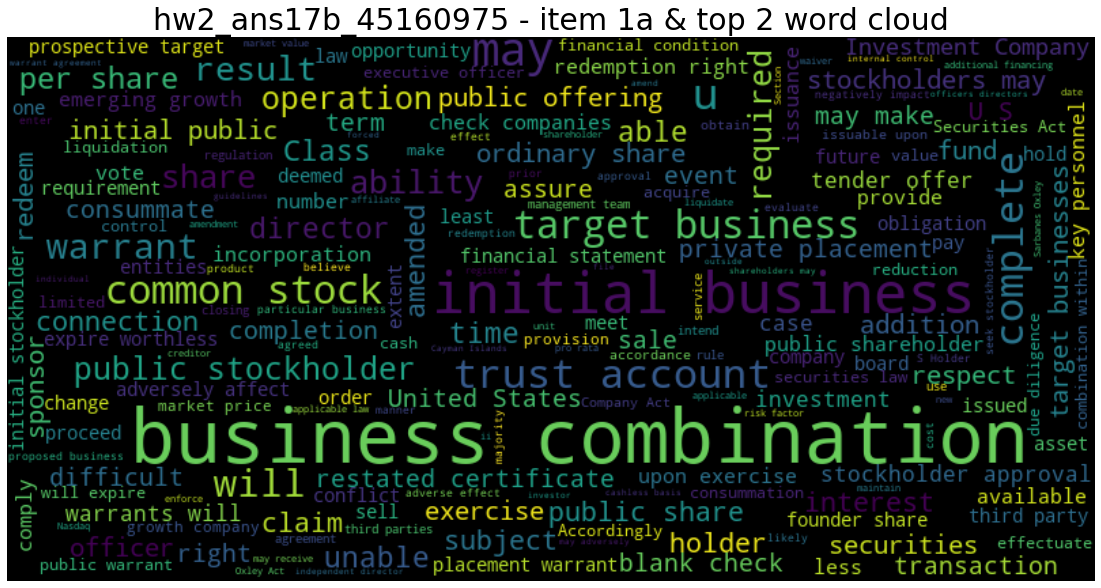

In [92]:
# Generate wordcloud using user defined function
# based on code from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title

print("Generate wordcloud using user defined function for 'item_1a' and 2 most common industry")
generate_wordcloud(top_1_string_17)
plt.title('hw2_ans17a_45160975 - item 1a & top 1 word cloud', fontdict={'fontsize':30})
plt.savefig('hw2_ans17a_45160975.png')
plt.show()

generate_wordcloud(top_2_string_17)
plt.title('hw2_ans17b_45160975 - item 1a & top 2 word cloud', fontdict={'fontsize':30})
plt.savefig('hw2_ans17b_45160975.png')
plt.show()

### Question18. Make two separate wordclouds for `item_7` column
- One for the most common industry and another one for the second most common industry.
- Save the graph named "`hw2_ans18a_{student_id}.png`" and "`hw2_ans18b_{student_id}.png`".<br/>
  (e.g.) <b>hw2_ans18a_37510930.png</b>, <b>hw2_ans18b_37510930.png</b>, respectively.

In [93]:
# Getting the wordclouds input
# based on code from class 05 'inter_ch4_loops'

print("Getting the wordclouds input for 'item_7' and 2 most common industry")
top_1_string_18 = ''
top_2_string_18 = ''
for i,row in df.iterrows():
    if row['industry_name']==top_1:
        k=row['item_7']
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        top_1_string_18 = top_1_string_18 + ' ' + k
    if row['industry_name']==top_2:
        k=row['item_7']
        while k.count('  ')>0:
            t=k.split('  ')
            k=' '.join(t)
        top_2_string_18 = top_2_string_18+ ' ' + k

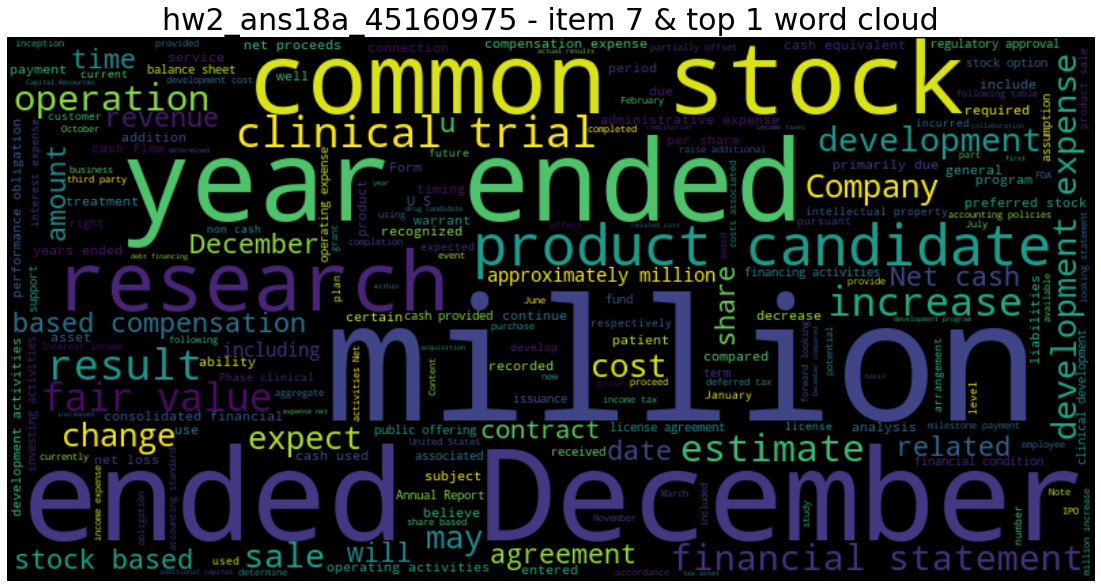

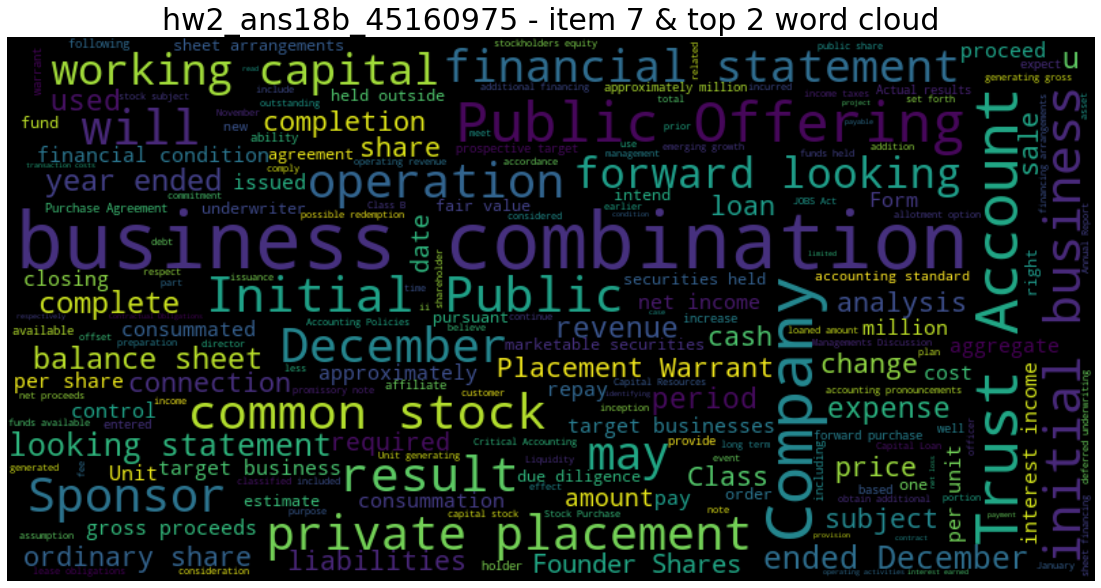

In [94]:
# Generate wordcloud using user defined function
# based on code from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title

print("Generate wordcloud using user defined function for 'item_7' and 2 most common industry")
generate_wordcloud(top_1_string_18)
plt.title('hw2_ans18a_45160975 - item 7 & top 1 word cloud', fontdict={'fontsize':30})
plt.savefig('hw2_ans18a_45160975.png')
plt.show()

generate_wordcloud(top_2_string_18)
plt.title('hw2_ans18b_45160975 - item 7 & top 2 word cloud', fontdict={'fontsize':30})
plt.savefig('hw2_ans18b_45160975.png')
plt.show()

### Question19. Make two histograms of the polarity for `item_1a` column. 
- One for the most common industry and another one for the second most common industry.
- Save the graph named "`hw2_ans19a_{student_id}.png`" and "`hw2_ans19b_{student_id}.png`".<br/>
  (e.g.) <b>hw2_ans19a_37510930.png</b>, <b>hw2_ans19b_37510930.png</b>, respectively.

In [133]:
# Making the polarity string
# based on code from class 08 'nlp_part3_sentiment_analysis'
### Using string from question 17

print("Making the polarity string for 'item_1a' and 2 most common industry")
       
pol_list_top_1 = []
for s in df[df['industry_name']==top_1]['item_1a']:
    tb = TextBlob(str(s))
    pol_list_top_1.append(tb.sentiment.polarity)    
    
pol_list_top_2 = []
for s in df[df['industry_name']==top_2]['item_1a']:
    tb = TextBlob(str(s))
    pol_list_top_2.append(tb.sentiment.polarity)


Making the polarity string for 'item_1a' and 2 most common industry


Plotting the histogram for 'item_1a' and 2 most common industry


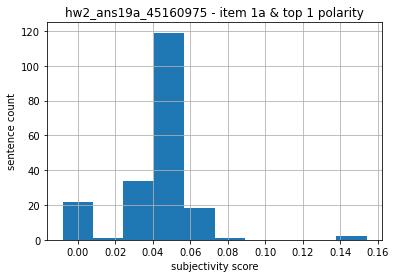

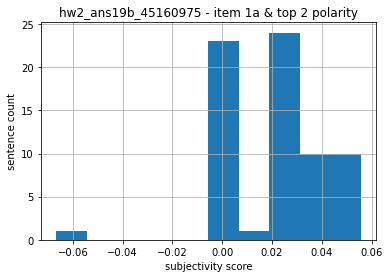

In [134]:
# Plotting the histogram
# based on code from class 08 'nlp_part3_sentiment_analysis'

print("Plotting the histogram for 'item_1a' and 2 most common industry")
plt.hist(pol_list_top_1, bins=10) #, normed=1, alpha=0.75)
plt.title('hw2_ans19a_45160975 - item 1a & top 1 polarity')
plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('hw2_ans19a_45160975.png')
plt.show()

plt.hist(pol_list_top_2, bins=10) #, normed=1, alpha=0.75)
plt.title('hw2_ans19b_45160975 - item 1a & top 2 polarity')
plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('hw2_ans19b_45160975.png')
plt.show()


### Question 20: Make outfile name format as `hw2_answers_{student_id}.txt` and save it to `txt` file                
- When you write the answer, please keep format(please refer to word doc example).
- File name should be like this : <b>hw2_answers_37510930.txt</b>

In [119]:
# Question 20

# Writing a text file
# based on code from class 07 'import1_ch1_import flatfile' and class 5 'inter_ch4_advanced looping'
outfile = open('hw2_answers_{}.txt'.format(student_id), 'w')
outfile.write('{}, {}, {}\n'.format(last_name, first_name, email))

outfile.write('answer1={}\n'.format(ans1))
outfile.write('answer2={}\n'.format(ans2))
outfile.write('answer3={}\n'.format(ans3))
outfile.write('answer4={}\n'.format(ans4))
outfile.write('answer5={}\n'.format(ans5))
outfile.write('answer6={}\n'.format(ans6))
outfile.write('answer7={}\n'.format(ans7))
outfile.write('answer8={}\n'.format(ans8))
outfile.write('answer9={}\n'.format(ans9))
outfile.write('answer10={}\n'.format(ans10))
outfile.write('answer11={}\n'.format(ans11))
outfile.write('answer12={}\n'.format(ans12))
outfile.write('answer13={}\n'.format(ans13))
outfile.write('answer14={}\n'.format(ans14))
outfile.write('answer15={}\n'.format(ans15))


outfile.write('HW 2 is done!!!')
outfile.close()

outfile 

<_io.TextIOWrapper name='hw2_answers_45160975.txt' mode='w' encoding='cp1252'>

#### After finishing `hw2`, please submit this python code file on Canvas!!
#### But, you don't need to submit the `.png` files. 

#### Output file format
1. Please follow the instruction file name and answer type. Please refer to `BAIT508_HW2_final.docx`.
2. Before submitting the code, please run the whole code and check whether there is a problem or not.

#### Again, the code file name should be as follows: `hw2_{student_id}.py` 
(e.g.) hw2_37510930.py